___
# Ciência dos Dados - PROJETO 1

### Victor Arruda Niubó e Bruno Morales Balkins

    

## Perfil das mulheres como chefes de família:

___
## Introdução


Nesse projeto iremos analisar o perfil de mulheres no papel de chefes de família e comparar com homens no mesmo papel, para isso escolhemos as seguintes variáveis do banco de dados:
    - V0302: Sexo.
    - V8005: Idade.
    - V0402: Condição na familia
    - V4704: Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade.
    - V4805: Condição de ocupação na semana de referência para pessoas de 10 anos ou mais de idade.
    - V4706: Posição na ocupação no trabalho principal da semana de referência para pessoas de 10 anos ou mais de 
    idade.

## Pergunta:
### Quais as diferenças entre homens e mulheres chefes de família?

___
## Filtros da base de dados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
dados = pd.read_csv('PES2015.csv',sep=',')

In [4]:
#Filtro de dados:

dados_filtrados = dados.loc[(dados.V0302)|(dados.V8005)|(dados.V0402)|(dados.V4704)|(dados.V4805)|(dados.V4706), \
          ['V0302','V8005','V0402','V4704','V4805','V4706']]

#Mudando nomes das colunas:

dados_filtrados.rename(columns={'V0302':'Sexo','V8005':'Idade','V0402':'Condicao_familia',\
                                'V4704':'Atividade_na_semana','V4805':'Ocupação_na_semana',\
                                'V4706':'Posicao_no_Trabalho'}, inplace=True)


In [5]:
df2 = dados_filtrados.dropna(subset = ['Atividade_na_semana','Ocupação_na_semana','Posicao_no_Trabalho'])

In [6]:
df2 = df2[(df2['Condicao_familia'])== 1]
df2 = df2[(df2['Atividade_na_semana'])== 1]
df2 = df2[(df2['Ocupação_na_semana'])== 1]
df2 = df2[(df2['Posicao_no_Trabalho'])!= 13]

In [7]:
df2.Sexo = df2.Sexo.astype('category')
df2.Idade = df2.Idade.astype('float')
df2['Condicao_familia'] = df2['Condicao_familia'].astype('category')
df2['Atividade_na_semana'] = df2['Atividade_na_semana'].astype('category')
df2['Ocupação_na_semana'] = df2['Ocupação_na_semana'].astype('category')
df2['Posicao_no_Trabalho'] = df2['Posicao_no_Trabalho'].astype('category')

In [8]:
df2.Sexo.cat.categories = (['M','F'])
df2['Condicao_familia'].cat.categories = (['Pessoa de referência'])
df2['Atividade_na_semana'].cat.categories = (['Economicamente ativa'])
df2['Ocupação_na_semana'].cat.categories = (['Ocupada'])
df2['Posicao_no_Trabalho'].cat.categories = (['Empregado com carteira de trabalho assinada','Militar',\
                                              'Funcionário público estatutário',\
                                              'Outro empregado sem carteira de trabalho assinada',\
                                              'Trabalhador doméstico com carteira de trabalho assinada',\
                                             'Trabalhador doméstico sem carteira  de trabalho assinada',\
                                             'Conta própria','Empregador','Trabalhador na produção para o próprio consumo',\
                                             'Trabalhador na construção para o próprio uso'])




In [9]:
pd.crosstab(index=[df2.Sexo], columns=[df2.Posicao_no_Trabalho])

Posicao_no_Trabalho,Empregado com carteira de trabalho assinada,Militar,Funcionário público estatutário,Outro empregado sem carteira de trabalho assinada,Trabalhador doméstico com carteira de trabalho assinada,Trabalhador doméstico sem carteira de trabalho assinada,Conta própria,Empregador,Trabalhador na produção para o próprio consumo,Trabalhador na construção para o próprio uso
Sexo,,,,,,,,,,
M,21021,281,3596,7308,315,315,17772,3290,1577,96
F,8031,21,3065,2686,1345,3226,5594,662,875,10


In [13]:
ut1 = df2.Sexo.value_counts(sort=False)
print(ut1,'\n')

M    55571
F    25515
Name: Sexo, dtype: int64 



In [17]:
ut2 = df2.Condicao_familia.value_counts(sort=False)
print(ut2,'\n')

Pessoa de referência    81086
Name: Condicao_familia, dtype: int64 



In [19]:
ut3 = df2.Posicao_no_Trabalho.value_counts(sort=False)
print(ut3,'\n')

Empregado com carteira de trabalho assinada                 29052
Militar                                                       302
Funcionário público estatutário                              6661
Outro empregado sem carteira de trabalho assinada            9994
Trabalhador doméstico com carteira de trabalho assinada      1660
Trabalhador doméstico sem carteira  de trabalho assinada     3541
Conta própria                                               23366
Empregador                                                   3952
Trabalhador na produção para o próprio consumo               2452
Trabalhador na construção para o próprio uso                  106
Name: Posicao_no_Trabalho, dtype: int64 



In [20]:

ut1 = (df2.Sexo.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')


ut2 = (df2.Condicao_familia.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut2,'\n')


ut3 = (df2.Posicao_no_Trabalho.value_counts(sort=True, normalize=True)*100).round(decimals=1)
print(ut3,'\n')


M    68.5
F    31.5
Name: Sexo, dtype: float64 

Pessoa de referência    100.0
Name: Condicao_familia, dtype: float64 

Empregado com carteira de trabalho assinada                 35.8
Conta própria                                               28.8
Outro empregado sem carteira de trabalho assinada           12.3
Funcionário público estatutário                              8.2
Empregador                                                   4.9
Trabalhador doméstico sem carteira  de trabalho assinada     4.4
Trabalhador na produção para o próprio consumo               3.0
Trabalhador doméstico com carteira de trabalho assinada      2.0
Militar                                                      0.4
Trabalhador na construção para o próprio uso                 0.1
Name: Posicao_no_Trabalho, dtype: float64 



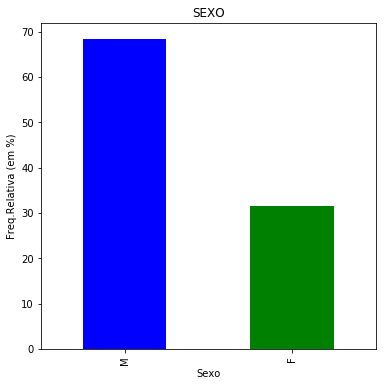

In [21]:
plot = ut1.plot(kind='bar',title='SEXO',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Sexo')
plt.show()

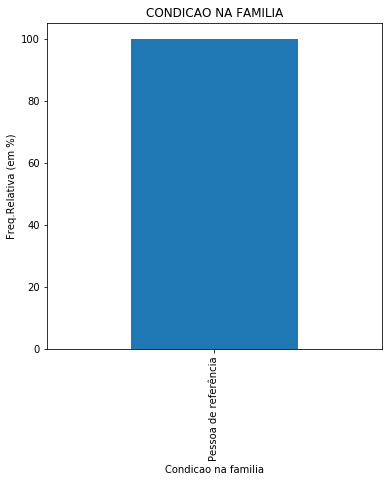

In [23]:
plot = ut2.plot(kind='bar',title='CONDICAO NA FAMILIA',figsize=(6, 6))#,color=('b','g','r'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Condicao na familia')
plt.show()

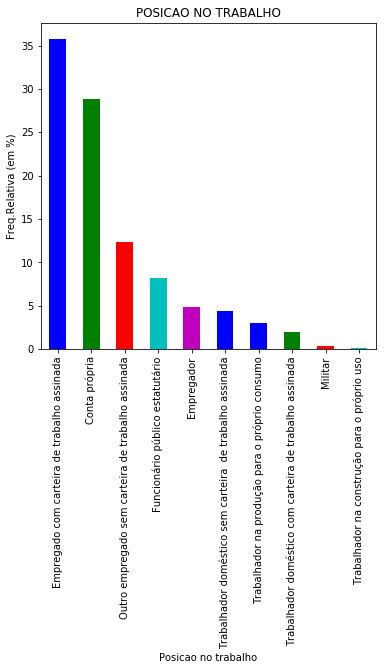

In [22]:
plot = ut3.plot(kind='bar',title='POSICAO NO TRABALHO',figsize=(6, 6),color=('b','g','r','c','m'))
plt.ylabel('Freq.Relativa (em %)')
plt.xlabel('Posicao no trabalho')
plt.show()

In [25]:
ct=pd.crosstab(df2.Posicao_no_Trabalho, df2.Sexo, margins=True, rownames=['POSICAO NO TRABALHO'], colnames=['SEXO'])
ct

SEXO,M,F,All
POSICAO NO TRABALHO,,,
Outro empregado sem carteira de trabalho assinada,7308,2686,9994
Empregado com carteira de trabalho assinada,21021,8031,29052
Conta própria,17772,5594,23366
Trabalhador doméstico sem carteira de trabalho assinada,315,3226,3541
Funcionário público estatutário,3596,3065,6661
Trabalhador na construção para o próprio uso,96,10,106
Empregador,3290,662,3952
Trabalhador doméstico com carteira de trabalho assinada,315,1345,1660
Trabalhador na produção para o próprio consumo,1577,875,2452


In [28]:
ct1=pd.crosstab(df2.Posicao_no_Trabalho, df2.Sexo, margins=True, rownames=['POSICAO NO TRABALHO'], colnames=['SEXO'], normalize=True)*100
ct1

SEXO,M,F,All
POSICAO NO TRABALHO,,,
Outro empregado sem carteira de trabalho assinada,9.012653,3.312532,12.325186
Empregado com carteira de trabalho assinada,25.924327,9.904299,35.828626
Conta própria,21.917470,6.898848,28.816318
Trabalhador doméstico sem carteira de trabalho assinada,0.388476,3.978492,4.366968
Funcionário público estatutário,4.434798,3.779937,8.214735
Trabalhador na construção para o próprio uso,0.118393,0.012333,0.130725
Empregador,4.057421,0.816417,4.873838
Trabalhador doméstico com carteira de trabalho assinada,0.388476,1.658733,2.047209
Trabalhador na produção para o próprio consumo,1.944849,1.079101,3.023950


In [29]:
ct1=ct1.round(decimals=0)
ct1

SEXO,M,F,All
POSICAO NO TRABALHO,,,
Outro empregado sem carteira de trabalho assinada,9.0,3.0,12.0
Empregado com carteira de trabalho assinada,26.0,10.0,36.0
Conta própria,22.0,7.0,29.0
Trabalhador doméstico sem carteira de trabalho assinada,0.0,4.0,4.0
Funcionário público estatutário,4.0,4.0,8.0
Trabalhador na construção para o próprio uso,0.0,0.0,0.0
Empregador,4.0,1.0,5.0
Trabalhador doméstico com carteira de trabalho assinada,0.0,2.0,2.0
Trabalhador na produção para o próprio consumo,2.0,1.0,3.0


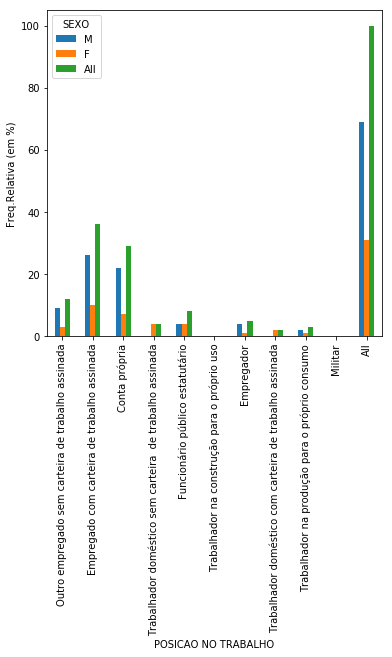

In [30]:
plot = ct1.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

___
## Análise e Resultados

___
## Conclusão 

Descreva aqui suas conclusões!